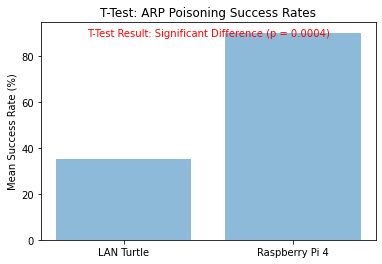

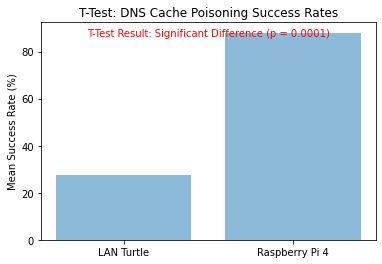

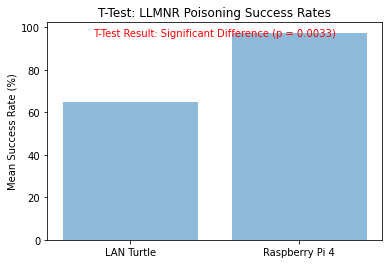

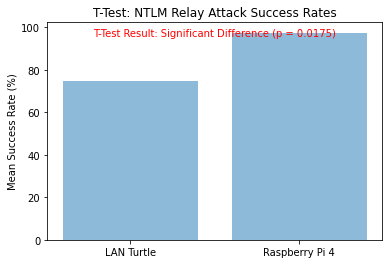

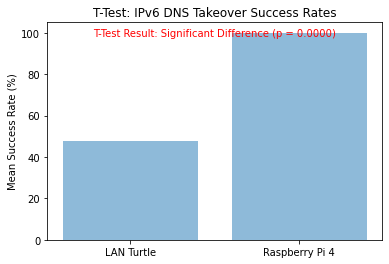

P-values for t-tests:
ARP Poisoning: 0.0004
DNS Cache Poisoning: 0.0001
LLMNR Poisoning: 0.0033
NTLM Relay Attack: 0.0175
IPv6 DNS Takeover: 0.0000


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# T-Tests
#Success rates as fractions for different attack types (LAN Turtle)
lan_turtle_data_fractions = {
    'ARP Poisoning': [3/10, 2/10, 4/10, 5/10],  # LAN Turtle success rates for ARP Poisoning (as fractions)
    'DNS Cache Poisoning': [3/10, 2/10, 4/10, 2/10 ],  # LAN Turtle success rates for DNS Cache Poisoning (as fractions)
    'LLMNR Poisoning': [5/10,7/10,8/10,6/10],  # LAN Turtle success rates for LLMNR Poisoning (as fractions)
    'NTLM Relay Attack': [7/10, 9/10, 8/10, 6/10],  # LAN Turtle success rates for NTLM Relay Attack (as fractions)
    'IPv6 DNS Takeover': [4/10, 5/10, 6/10, 4/10]  # LAN Turtle success rates for IPv6 DNS Takeover (as fractions)
}

# Convert LAN Turtle success rates from fractions to percentages for each attack type
lan_turtle_data = {attack: [rate * 100 for rate in rates] for attack, rates in lan_turtle_data_fractions.items()}

# Success rates as fractions for Raspberry Pi 4 for each attack type
raspberry_pi_data_fractions = {
    'ARP Poisoning': [9/10, 8/10, 9/10, 10/10],  # Raspberry Pi 4 success rates for ARP Poisoning (as fractions)
    'DNS Cache Poisoning': [10/10, 8/10, 7/10, 9/10, 10/10],  # Raspberry Pi 4 success rates for DNS Cache Poisoning (as fractions)
    'LLMNR Poisoning': [10/10, 9/10, 10/10, 10/10],  # Raspberry Pi 4 success rates for LLMNR Poisoning (as fractions)
    'NTLM Relay Attack': [10/10, 9/10, 10/10, 10/10],  # Raspberry Pi 4 success rates for NTLM Relay Attack (as fractions)
    'IPv6 DNS Takeover': [10/10, 10/10, 10/10, 10/10]  # Raspberry Pi 4 success rates for IPv6 DNS Takeover (as fractions)
}

# Convert Raspberry Pi 4 success rates from fractions to percentages for each attack type
raspberry_pi_data = {attack: [rate * 100 for rate in rates] for attack, rates in raspberry_pi_data_fractions.items()}

# Perform t-test for each attack type
p_values = {}
for attack, data in lan_turtle_data.items():
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(data, raspberry_pi_data[attack])

    # Store p-value for each attack type
    p_values[attack] = p_value

    # Visualization (Bar plot for comparison)
    labels = ['LAN Turtle', 'Raspberry Pi 4']
    means = [np.mean(data), np.mean(raspberry_pi_data[attack])]
    x_pos = np.arange(len(labels))

    plt.bar(x_pos, means, align='center', alpha=0.5)
    plt.xticks(x_pos, labels)
    plt.ylabel('Mean Success Rate (%)')
    plt.title(f'T-Test: {attack} Success Rates')

    # Show t-test result
    if p_value < 0.05:
        plt.text(0.5, 0.95, f'T-Test Result: Significant Difference (p = {p_value:.4f})', ha='center', va='center',
                 transform=plt.gca().transAxes, color='red')
    else:
        plt.text(0.5, 0.95, f'T-Test Result: No Significant Difference (p = {p_value:.4f})', ha='center', va='center',
                 transform=plt.gca().transAxes, color='green')

    plt.show()

# Display p-values for each attack type
print("P-values for t-tests:")
for attack, p_value in p_values.items():
    print(f"{attack}: {p_value:.4f}")